In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df = data.frame
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [4]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [5]:
X = df.drop('target', axis = 1)
y = df['target']

In [6]:
correlation_matrix = df.corr() 
print(correlation_matrix)

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -

In [7]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
to_drop = [column for column in upper.columns if any (upper[column] > 0.95)]
x_reduce = X.drop(columns = to_drop)
x_reduce

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,concave points error,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.01867,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,...,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,...,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,...,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,...,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
x_reduce.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst texture', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

In [9]:
import statsmodels.api as sm

X_const = sm.add_constant(x_reduce)


In [10]:
model = sm.Logit(y, X_const)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.036903
         Iterations 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  569
Model:                          Logit   Df Residuals:                      545
Method:                           MLE   Df Model:                           23
Date:                Fri, 15 Aug 2025   Pseudo R-squ.:                  0.9441
Time:                        10:20:16   Log-Likelihood:                -20.998
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                4.545e-135
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     103.8447     36.003      2.884      0.004      33.280     174.409
mean radius                -1.7697      0.791     -2.238      0.025      -3.320      -0.220
mean texture                0.2662      0.334      0.797      0.425      -0.388       0.921
mean smoothness          -182.4330    118.254     -1.543      0.123    -414.207      49.341
mean compactness          138.6832     93.874      1.477      0.140     -45.306     322.673
mean concavity           -107.8974     68.669     -1.571      0.116    -242.487      26.692
mean concave points        -3.5654    108.139     -0.033      0.974    -215.514     208.384
mean symmetry              55.3856     42.870      1.292      0.196     -28.638     139.409
mean fractal dimension   -124.2543    315.092     -0.394      0.693    -741.824     493.315
radius error              -38.8085     13.128     -2.956      0.003     -64.540     -13.077
texture error               5.5030      2.349      2.342      0.019       0.898      10.108
smoothness error         -605.4090    350.276     -1.728      0.084   -1291.938      81.120
compactness error        -333.3153    177.619     -1.877      0.061    -681.443      14.812
concavity error           202.0945     93.101      2.171      0.030      19.621     384.568
concave points error     -676.0393    420.760     -1.607      0.108   -1500.714     148.636
symmetry error            264.4777    187.604      1.410      0.159    -103.218     632.174
fractal dimension error  4185.1475   1601.426      2.613      0.009    1046.411    7323.884
worst texture              -0.9795      0.352     -2.782      0.005      -1.669      -0.289
worst smoothness           53.4620     63.474      0.842      0.400     -70.944     177.868
worst compactness          43.6258     31.653      1.378      0.168     -18.414     105.665
worst concavity           -22.3973     18.855     -1.188      0.235     -59.353      14.559
worst concave points      -33.7196     60.301     -0.559      0.576    -151.907      84.468
worst symmetry            -53.8119     27.327     -1.969      0.049    -107.372      -0.252
worst fractal dimension  -461.8041    206.469     -2.237      0.025    -866.477     -57.132
===========================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [11]:

# Make a copy so we don't modify original data
X_sel = x_reduce.copy()

# Add constant term
X_sel = sm.add_constant(X_sel)

while True:
    model = sm.Logit(y, X_sel).fit(disp=False)  # disp=False to suppress output
    p_values = model.pvalues

    # Drop the max p-value feature if it's > 0.05
    max_pval = p_values.max()
    if max_pval > 0.05:
        feature_to_drop = p_values.idxmax()
        if feature_to_drop == 'const':
            break  # don't drop the constant
        print(f"Dropping '{feature_to_drop}' with p-value {max_pval:.4f}")
        X_sel = X_sel.drop(columns=[feature_to_drop])
    else:
        break

print("\nFinal significant features:")
print(X_sel.columns.tolist())
print(model.summary2())


Dropping 'mean concave points' with p-value 0.9737
Dropping 'mean fractal dimension' with p-value 0.6827
Dropping 'worst concave points' with p-value 0.5393
Dropping 'worst smoothness' with p-value 0.4050
Dropping 'mean texture' with p-value 0.3319
Dropping 'worst concavity' with p-value 0.2632
Dropping 'worst compactness' with p-value 0.3455
Dropping 'mean symmetry' with p-value 0.3142
Dropping 'symmetry error' with p-value 0.1743
Dropping 'compactness error' with p-value 0.3443
Dropping 'concavity error' with p-value 0.1103
Dropping 'concave points error' with p-value 0.1201
Dropping 'worst symmetry' with p-value 0.0772

Final significant features:
['const', 'mean radius', 'mean smoothness', 'mean compactness', 'mean concavity', 'radius error', 'texture error', 'smoothness error', 'fractal dimension error', 'worst texture', 'worst fractal dimension']
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.920      
Dependent V

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


In [12]:
X_sel.columns

Index(['const', 'mean radius', 'mean smoothness', 'mean compactness',
       'mean concavity', 'radius error', 'texture error', 'smoothness error',
       'fractal dimension error', 'worst texture', 'worst fractal dimension'],
      dtype='object')

In [13]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32


In [14]:
X1 =sm.add_constant(X_sel)
reg = sm.Logit(y, X1).fit()
reg.summary()

Optimization terminated successfully.
         Current function value: 0.053128
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  569
Model:                          Logit   Df Residuals:                      558
Method:                           MLE   Df Model:                           10
Date:                Fri, 15 Aug 2025   Pseudo R-squ.:                  0.9195
Time:                        10:20:18   Log-Likelihood:                -30.230
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                5.420e-142
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      75.4073     16.253      4.639      0.000      43.551     107.263
mean radius                -1.7618      0.401     -4.397      0.000      -2.547      -0.976
mean smoothness          -134.2344     60.822     -2.207      0.027    -253.443     -15.026
mean compactness           62.3006     24.387      2.555      0.011      14.503     110.098
mean concavity            -64.4405     14.657     -4.396      0.000     -93.168     -35.713
radius error              -24.7954      7.032     -3.526      0.000     -38.578     -11.013
texture error               3.1169      1.241      2.511      0.012       0.684       5.549
smoothness error         -404.9658    164.981     -2.455      0.014    -728.322     -81.610
fractal dimension error  2122.1648    557.145      3.809      0.000    1030.180    3214.149
worst texture              -0.5609      0.133     -4.206      0.000      -0.822      -0.300
worst fractal dimension  -277.3302     79.732     -3.478      0.001    -433.603    -121.058
===========================================================================================

Possibly complete quasi-separation: A fraction 0.61 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

def calculate_vif(df):
    vif = pd.DataFrame()
    vif["feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Start with original X (no constant)
X_vif = X_sel.copy()

# Iteratively drop features with high VIF
while True:
    vif_df = calculate_vif(X_vif)
    max_vif = vif_df["VIF"].max()
    if max_vif > 10:
        drop_col = vif_df.sort_values("VIF", ascending=False)["feature"].iloc[0]
        print(f"Dropping {drop_col} with VIF={max_vif:.2f}")
        X_vif = X_vif.drop(columns=[drop_col])
    else:
        break

# Add constant AFTER VIF cleaning
X_const = sm.add_constant(X_vif)

# Fit logistic regression
model = sm.Logit(y, X_const).fit()
print(model.summary2())


Dropping const with VIF=221.21
Dropping mean smoothness with VIF=82.03
Dropping worst fractal dimension with VIF=49.64
Dropping worst texture with VIF=26.49
Dropping mean compactness with VIF=21.96
Optimization terminated successfully.
         Current function value: 0.157947
         Iterations 10
                               Results: Logit
Model:                  Logit               Pseudo R-squared:    0.761      
Dependent Variable:     target              AIC:                 193.7433   
Date:                   2025-08-15 10:20    BIC:                 224.1504   
No. Observations:       569                 Log-Likelihood:      -89.872    
Df Model:               6                   LL-Null:             -375.72    
Df Residuals:           562                 LLR p-value:         2.9642e-120
Converged:              1.0000              Scale:               1.0000     
No. Iterations:         10.0000                                             
-------------------------------------

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


In [16]:
cleaned_df = X_vif.drop(columns = ['smoothness error', 'texture error'], axis = 1)

In [17]:
x2 = sm.add_constant(cleaned_df)
reg2 = sm.Logit(y, x2).fit()
reg2.summary()

Optimization terminated successfully.
         Current function value: 0.158044
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  569
Model:                          Logit   Df Residuals:                      564
Method:                           MLE   Df Model:                            4
Date:                Fri, 15 Aug 2025   Pseudo R-squ.:                  0.7607
Time:                        10:20:18   Log-Likelihood:                -89.927
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.184e-122
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      13.2971      1.851      7.185      0.000       9.670      16.925
mean radius                -0.6160      0.123     -4.999      0.000      -0.857      -0.374
mean concavity            -49.7022      6.486     -7.663      0.000     -62.415     -36.990
radius error               -6.6547      1.764     -3.772      0.000     -10.113      -3.197
fractal dimension error   714.9743    138.261      5.171      0.000     443.988     985.960
===========================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(cleaned_df, y, test_size = 0.2, random_state = 42)

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

model.predict(y_test)

In [19]:
train_acc = model.score(x_train, y_train)
test_acc = model.score(x_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.8901
Test Accuracy: 0.9298


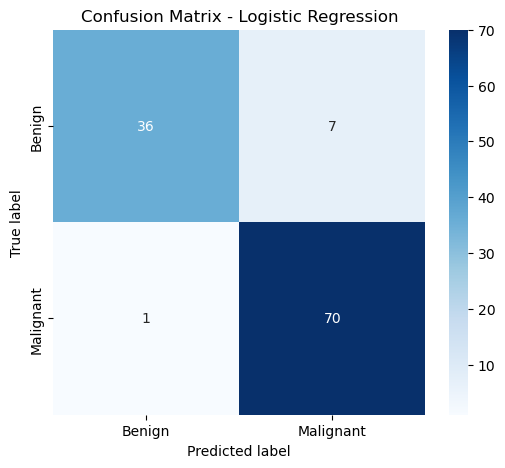

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Class names
labels = ["Benign", "Malignant"]

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [23]:
# Given confusion matrix values
TN = 36  # True Negatives (Benign correctly predicted)
FP = 7   # False Positives (Benign predicted as Malignant)
FN = 1   # False Negatives (Malignant predicted as Benign)
TP = 70  # True Positives (Malignant correctly predicted)

# Metrics calculation
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision_malignant = TP / (TP + FP)
recall_malignant = TP / (TP + FN)
f1_malignant = 2 * (precision_malignant * recall_malignant) / (precision_malignant + recall_malignant)

accuracy, precision_malignant, recall_malignant, f1_malignant


(0.9298245614035088,
 0.9090909090909091,
 0.9859154929577465,
 0.9459459459459459)

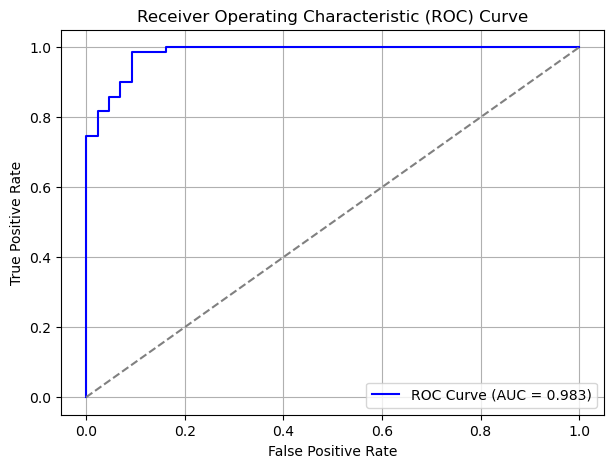

AUC Score: 0.983


In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for positive class
y_probs = model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.3f}")